In [9]:
import numpy as np
import random
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

lucky_box = np.load('luckybox.npy')
unique, count = np.unique(lucky_box, return_counts=True)

In [2]:
gt_probability = {}
for n, cnt in zip(unique, count):
    gt_probability[str(int(n))] = cnt/np.sum(count)
gt_probability

{'0': 0.714285712244898,
 '1': 2.857142848979592e-09,
 '2': 0.01428571424489796,
 '3': 0.042857142734693876,
 '4': 0.05714285697959184,
 '5': 0.1714285709387755}

In [3]:
def check(error):
    if error < 0.0001 :
        print('pass the test')
    else:
        print('fail the test')
        
def eval(my_probability):
    error = 0
    for key, value in gt_probability.items():
        error += np.abs(gt_probability[key]-my_probability[key])
    print(gt_probability)
    print(my_probability)
    # print('error: ', error)
    return error
    
my_probability = {'0': 1/6, '1': 1/6, '2': 1/6, '3': 1/6, '4': 1/6, '5': 1/6}
error = eval(my_probability)
check(error)

{'0': 0.714285712244898, '1': 2.857142848979592e-09, '2': 0.01428571424489796, '3': 0.042857142734693876, '4': 0.05714285697959184, '5': 0.1714285709387755}
{'0': 0.16666666666666666, '1': 0.16666666666666666, '2': 0.16666666666666666, '3': 0.16666666666666666, '4': 0.16666666666666666, '5': 0.16666666666666666}
fail the test


### 1번 문제: 전체 탐색을 통한 counting 

In [29]:
# lucky_box의 각 값들을 count
lucky_list = [0 for _ in range(6)]

for i in lucky_box:
    lucky_list[int(i)] += 1

In [40]:
# 개수 확인
count = 0
for i in range(6):
    coulucky_list[i]
    
print(count)
print(len(lucky_box))

350000001
350000001


In [45]:
my_probability = {}
for i in range(6):
    my_probability[str(i)] = lucky_list[i]/len(lucky_box)
my_probability

{'0': 0.714285712244898,
 '1': 2.857142848979592e-09,
 '2': 0.01428571424489796,
 '3': 0.042857142734693876,
 '4': 0.05714285697959184,
 '5': 0.1714285709387755}

In [46]:
error = eval(my_probability)
check(error)

pass the test


### 2번 문제: random sampling을 통한 counting

In [ ]:
import random

In [4]:
def eval(my_probability):
    error = 0
    for key, value in gt_probability.items():
        error += np.abs(gt_probability[key]-my_probability[key])
    # print(gt_probability)
    # print(my_probability)
    print('error: ', error)
    return error

In [69]:
# lucky_box의 각 값들을 count
lucky_list = [0 for _ in range(6)]
for i in range(len(lucky_box)):
    rand = random.randrange(1, len(lucky_box))
    lucky_list[int(lucky_box[rand])] += 1

# 확률
my_probability = {}
for i in range(6):
    my_probability[str(i)] = lucky_list[i]/len(lucky_box)
my_probability

{'0': 0.7142779893877772,
 '1': 0.0,
 '2': 0.014281399959196,
 '3': 0.042856619877552515,
 '4': 0.05715676269383782,
 '5': 0.1714272280816365}

In [70]:
error = eval(my_probability)
check(error)

error:  2.78114284919722e-05
pass the test


### 3번 error analysis

In [14]:
def eval(my_probability):
    error = 0
    for key, value in gt_probability.items():
        error += np.abs(gt_probability[key]-my_probability[key])
    # print(gt_probability)
    # print(my_probability)
    #print('error: ', error)
    return error

In [15]:
# 확률
def probability(lucky_list):
    my_probability = {}
    for i in range(6):
        my_probability[str(i)] = lucky_list[i]/len(lucky_box)
    return my_probability

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


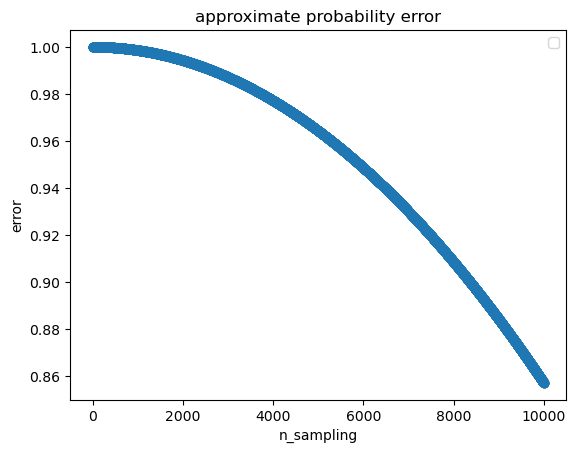

In [22]:
# Sampling count에 따른 error 변화
scatter = []
lucky_list = [0 for _ in range(6)]
# 시간 관계상 범위를 좁혀서 테스트함.
for i in range(10000):
    for j in range(i):
        rand = random.randrange(1, len(lucky_box))
        lucky_list[int(lucky_box[rand])] += 1
    my_probability = probability(lucky_list)
    scatter.append((i, eval(my_probability)))

# x, y 값 추출
x_values, y_values = zip(*scatter)

# 산점도
plt.scatter(x_values, y_values)
plt.xlabel('n_sampling')
plt.ylabel('error')
plt.title('approximate probability error')
plt.legend()
plt.show()